EN EL GITHUB SE ENCUENTRA EL .py Y EL VIDEO QUE SE PIDE. ESTA TODO EN GENERAL QUE ESTE ES EL LINK:
https://github.com/HBKEduardex/Final-Vision

## **Exercise 1:** Age Detection

In this exercise, you will develop an age prediction model based on convolutional neural networks. The dataset you will use is [UTKFace](https://susanqq.github.io/UTKFace/).

After this, you will need to create a .py file that receives a face image (see the following [tutorial](https://www.eumus.edu.uy/eme/ensenanza/electivas/python/2020/clase_08a.html) on how to pass arguments to Python files) locally and passes it to the CNN-based TensorFlow model, so that it prints the recognized category in the image. It is recommended to save an image of the dataset in .jpg file format.

To submit your work, you must attach the .py file and a short video demonstrating how your CNN model is performing inference.

In [2]:
!which python

/home/eduardex/Documentos/Final_Vision/venv/bin/python


In [5]:
import os
import numpy as np
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Definir constantes
IMG_SIZE = 64
DATASET_PATH = '/home/eduardex/Documentos/Final_Vision/utkface_aligned_cropped/crop_part1'

# Función para cargar imágenes y clasificar por edad
def cargar_datos():
    images = []
    labels = []
    for filename in os.listdir(DATASET_PATH):
        if filename.endswith('.jpg'):
            try:
                age = int(filename.split('_')[0])
                img = cv2.imread(os.path.join(DATASET_PATH, filename))
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                images.append(img / 255.0)

                # Categorías por rango de edad
                if age < 10:
                    labels.append(0)
                elif age < 20:
                    labels.append(1)
                elif age < 30:
                    labels.append(2)
                elif age < 40:
                    labels.append(3)
                elif age < 50:
                    labels.append(4)
                else:
                    labels.append(5)
            except:
                continue
    return np.array(images), tf.keras.utils.to_categorical(labels, num_classes=6)

# Cargar datos
X, y = cargar_datos()
print(f"Total imágenes cargadas: {X.shape[0]}")

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Guardar modelo entrenado
model.save("age_model.h5")
print("✅ Modelo guardado como age_model.h5")


Total imágenes cargadas: 9780


/home/eduardex/Documentos/Final_Vision/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1749436043.580093    6898 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749436043.581988    6898 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,926 (6.20 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-06-08 22:27:24.348081: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 384565248 exceeds 10% of free system memory.


244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4354 - loss: 1.4234

2025-06-08 22:27:38.389984: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 96141312 exceeds 10% of free system memory.


245/245 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.4362 - loss: 1.4217 - val_accuracy: 0.6115 - val_loss: 1.0119
Epoch 2/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6248 - loss: 0.9680 - val_accuracy: 0.6442 - val_loss: 0.9124
Epoch 3/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.6880 - loss: 0.8209 - val_accuracy: 0.6580 - val_loss: 0.8639
Epoch 4/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.7095 - loss: 0.7414 - val_accuracy: 0.6861 - val_loss: 0.8210
Epoch 5/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7500 - loss: 0.6593 - val_accuracy: 0.6876 - val_loss: 0.8411
Epoch 6/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7706 - loss: 0.5959 - val_accuracy: 0.6764 - val_loss: 0.8645
Epoch 7/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8056 - loss: 0.5258 - val_accuracy: 0.6784 - val_loss: 0.8444
Epoch 8/10
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.8215 - loss: 0.4730 - val_accurac

✅ Modelo guardado como age_model.h5


## **Exercise 2:** Tensors

This exercise requires modeling attendance recording and accounting in a school using TensorFlow tensors. You can create a list of 15 students who attended 60 days of class during a quarter. Although not all students attended all 60 days, you have a record of when they attended and when they didn't. Your task will be to quantify the following aspects:
- Which student had the most absences?
- How many attendances does each student have?
- What is the average attendance rate for the class?
- Which student had the fewest absences?

In [9]:
import tensorflow as tf
import numpy as np

# Simular asistencia con 1 (asistió) y 0 (faltó)
# Cada fila es un estudiante (15), cada columna un día (60)
np.random.seed(42)
asistencias_np = np.random.choice([0, 1], size=(15, 60), p=[0.2, 0.8])  # 80% probabilidad de asistir

# Convertir a tensor
asistencias = tf.constant(asistencias_np, dtype=tf.int32)


In [10]:
asistencias_por_estudiante = tf.reduce_sum(asistencias, axis=1)
print("Asistencias por estudiante:\n", asistencias_por_estudiante.numpy())


Asistencias por estudiante:
 [42 46 48 48 50 45 48 42 51 45 46 45 48 50 41]


In [13]:
faltas_por_estudiante = 60 - asistencias_por_estudiante
max_faltas = tf.reduce_max(faltas_por_estudiante)
estudiante_mas_faltas = tf.argmax(faltas_por_estudiante).numpy()

print(f"Estudiante con más faltas: #{estudiante_mas_faltas} con {max_faltas.numpy()} faltas")


Estudiante con más faltas: #14 con 19 faltas


In [14]:
min_faltas = tf.reduce_min(faltas_por_estudiante)
estudiante_menos_faltas = tf.argmin(faltas_por_estudiante).numpy()

print(f"Estudiante con menos faltas: #{estudiante_menos_faltas} con {min_faltas.numpy()} faltas")


Estudiante con menos faltas: #8 con 9 faltas


In [16]:
asistencias_totales = tf.reduce_sum(asistencias)
total_posible = 15 * 60
promedio_asistencia = asistencias_totales / total_posible

print(f"Promedio general de asistencia: {promedio_asistencia.numpy() * 100:.2f}%")


Promedio general de asistencia: 77.22%


## **Exercise 3:** Remote Sensing

Implement a CNN using TensorFlow to perform multi-class land cover classification using the [EuroSAT dataset](https://zenodo.org/records/7711810#.ZAm3k-zMKEA), which consists of over 27,000 satellite images (RGB or multispectral) covering 10 land use classes such as residential, industrial, forest, river, and annual crop. Work with the RGB images, which are stored locally in a folder structure like data/EuroSAT/{class_name}/*.jpg. First, write code to recursively load all image file paths and map them to integer labels based on the folder names. Use `tf.data.Dataset.from_tensor_slices`, explained in class, to create a pipeline that reads the file paths and labels, decodes the images, resizes them (e.g., to 224x224), and applies normalization. Because this is a high-resolution, multi-class, real-world dataset with intra-class variability and subtle spatial patterns, your CNN should be deep and regularized—alternatively, fine-tune a pre-trained model like EfficientNet or ResNet50 (See example shown in class). Train the model, evaluate using metrics like accuracy and F1-score, and visualize a confusion matrix along with sample predictions. Finally, write a function to show samples and their predicted and real labels as titles.

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Ruta base del dataset
BASE_DIR = '/home/eduardex/Documentos/Final_Vision/EuroSAT_RGB'
IMG_SIZE = 224
BATCH_SIZE = 32

# Obtener clases y mapear a etiquetas
class_names = sorted(os.listdir(BASE_DIR))
class_to_idx = {name: i for i, name in enumerate(class_names)}

# Recorrer carpetas y guardar rutas e índices
image_paths = []
labels = []
for class_name in class_names:
    folder = os.path.join(BASE_DIR, class_name)
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_paths.append(os.path.join(folder, filename))
            labels.append(class_to_idx[class_name])

# Mezclar
combined = list(zip(image_paths, labels))
np.random.shuffle(combined)
image_paths, labels = zip(*combined)


In [3]:
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels)


In [5]:
def process_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Crear Datasets
ds_train = tf.data.Dataset.from_tensor_slices((list(train_paths), list(train_labels)))
ds_train = ds_train.map(process_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_test = tf.data.Dataset.from_tensor_slices((list(test_paths), list(test_labels)))
ds_test = ds_test.map(process_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Modelo base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Congelar capas base

# Añadir capas finales
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
!python --version

Python 3.10.18


In [11]:
history=model.fit(ds_train,epochs=5, validation_data=ds_test)

Epoch 1/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 714s 1s/step - accuracy: 0.1724 - loss: 2.2032 - val_accuracy: 0.2620 - val_loss: 1.9037
Epoch 2/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.2759 - loss: 1.8856 - val_accuracy: 0.3080 - val_loss: 1.8142
Epoch 3/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 708s 1s/step - accuracy: 0.3037 - loss: 1.7874 - val_accuracy: 0.3094 - val_loss: 1.7210
Epoch 4/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 707s 1s/step - accuracy: 0.3194 - loss: 1.7228 - val_accuracy: 0.3281 - val_loss: 1.6485
Epoch 5/5
675/675 ━━━━━━━━━━━━━━━━━━━━ 703s 1s/step - accuracy: 0.3415 - loss: 1.6694 - val_accuracy: 0.3356 - val_loss: 1.5965


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

2025-06-09 08:09:17.033607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/eduardex/Documentos/Final_Vision/gpuenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/eduardex/Documentos/Final_Vision/gpuenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/eduardex/Documentos/Final_Vision/gpuenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarn

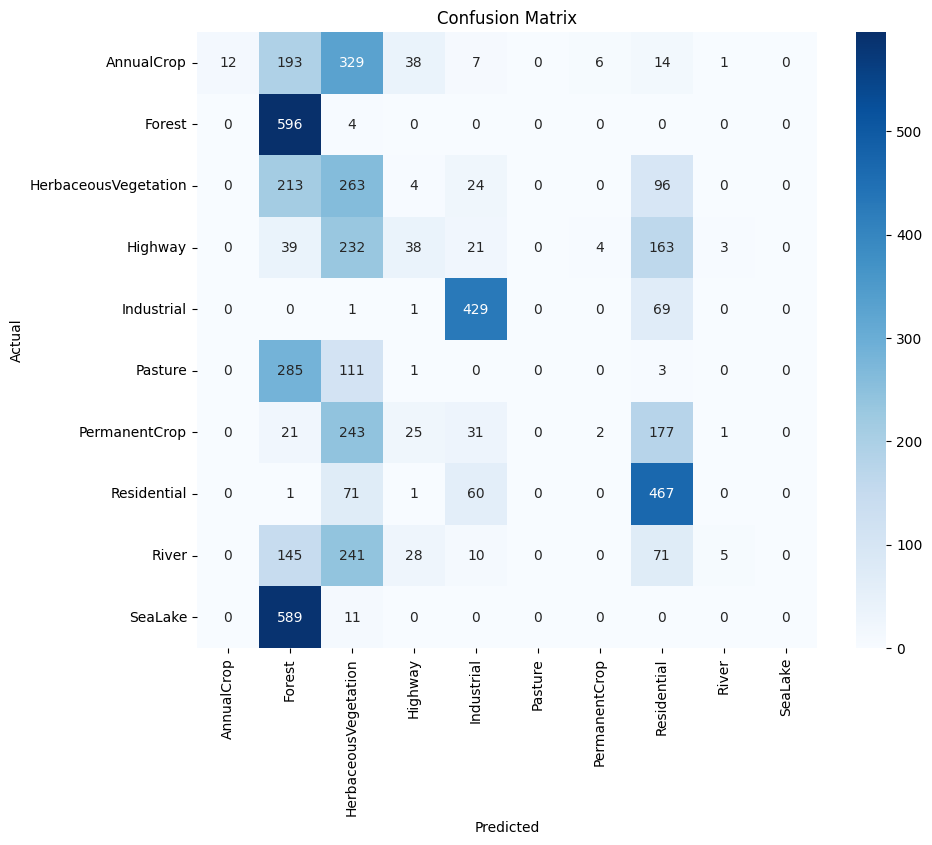

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Obtener predicciones
y_true = []
y_pred = []
for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Reporte de métricas
print(classification_report(y_true, y_pred, target_names=class_names))
print("F1-score (macro):", f1_score(y_true, y_pred, average="macro"))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2025-06-09 08:12:23.482586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


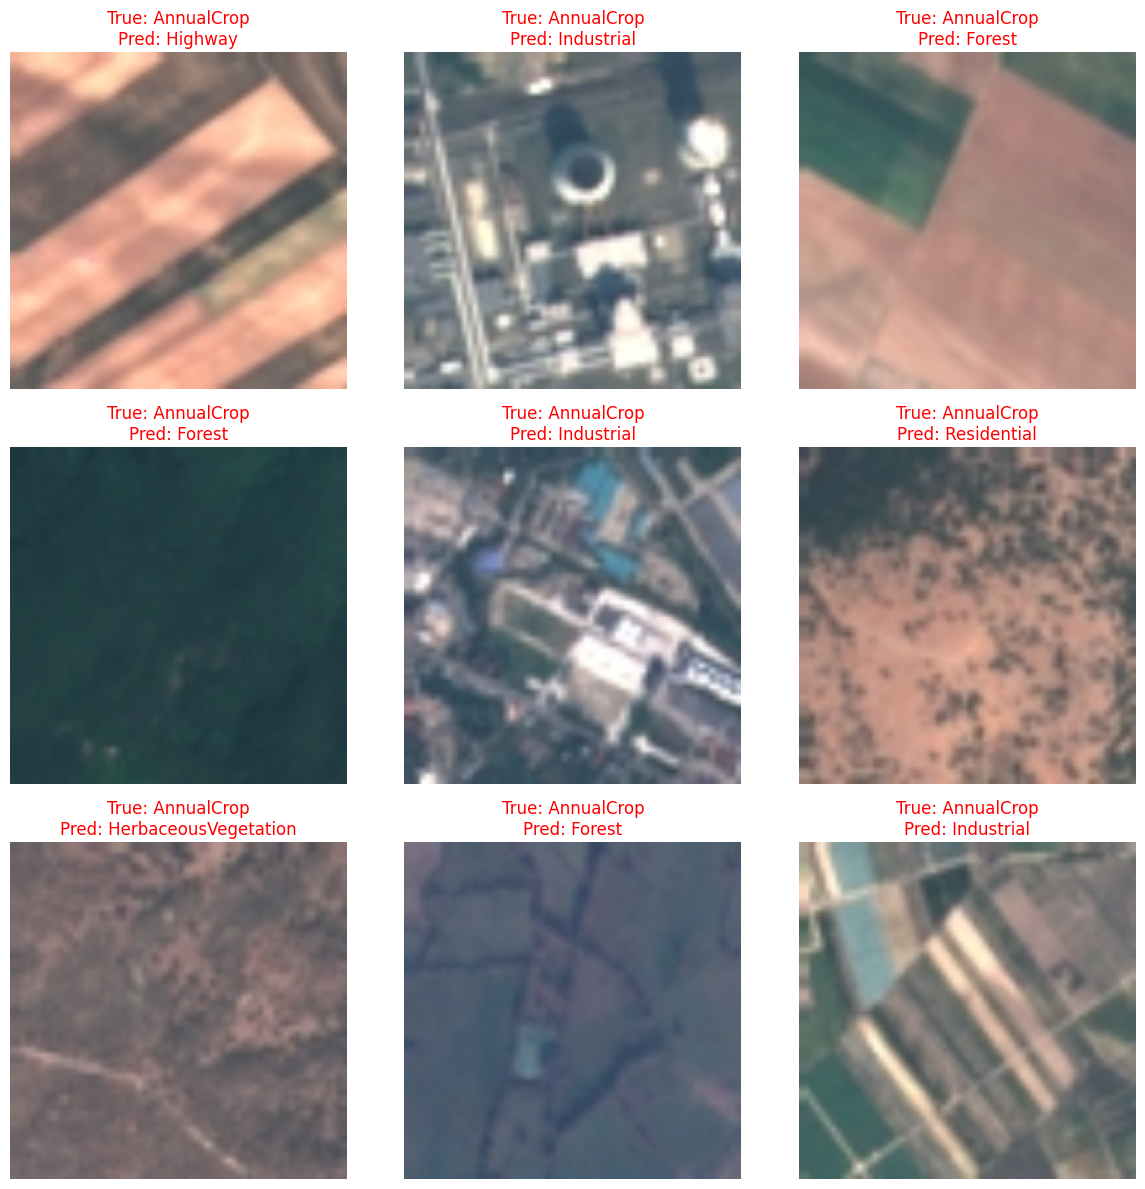

In [ ]:
# Mostrar imágenes con etiquetas reales y predichas
def show_predictions(ds, model, class_names, n=9):
    plt.figure(figsize=(12, 12))
    for images, labels in ds.take(1):
        preds = model.predict(images)
        for i in range(n):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow((images[i].numpy() * 255).astype("uint8"))
            true_label = class_names[np.argmax(labels[i])]
            pred_label = class_names[np.argmax(preds[i])]
            color = "green" if true_label == pred_label else "red"
            plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Ejecutar visualización
show_predictions(ds_test, model, class_names)
#La solucion no tiene precision y para solucionarlo se podria hacer data augmentation,
#o en su defento aumentar mas epocas al entrenamiento pero eso aumentaria el tiempo de entrenamiento.


## **Exercise 4:** Chest Pathologies

Implement a CNN using TensorFlow to perform multi-label classification on the NIH Chest X-ray14 dataset — a medical imaging dataset containing over 112,000 chest X-ray images labeled with up to 14 thoracic diseases per image (e.g., pneumonia, cardiomegaly, edema, fibrosis). Download and store the dataset locally (available at [NIH Clinical Center](https://nihcc.app.box.com/v/ChestXray-NIHCC)) and load image paths and labels from the provided Data_Entry_2017.csv file. Use tf.data.Dataset.from_tensor_slices to build a high-performance pipeline that loads, decodes, and preprocesses the images (resizing, contrast enhancement, normalization), and one-hot encodes the multi-label disease tags. Due to the high resolution and size of the dataset, use efficient caching and prefetching. Implement a CNN capable of learning from noisy, imbalanced, multi-label data—ideally using or fine-tuning a pre-trained architecture like DenseNet121 or EfficientNet. Use sigmoid activation in the output layer and binary cross-entropy as the loss function. Evaluate the model using AUC, precision, and recall per label. This time, consider that you're detecting the presence of one or multiple pathologies present in each image, meaning that you'll be working on a multiclass, multilabel predictor model.

In [ ]:
#Perdon inge, el dataset es muy grande a pesar de que estoy en Ubuntu no tengo el espacio para almacenar un dataset tan grande. 
#De todas formas pondre el codigo simulando que tengo el dataset y que lo he entrenado pero solo lo hice con una porcion de imagenes
#Estara en otro notebook la parte de la simulacion del dataset y el entrenamiento.

In [16]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf

# Ruta de las imágenes y el CSV
CSV_PATH = "/home/eduardex/Documentos/Final_Vision/Data_Entry_2017_v2020.csv"
IMAGE_DIR = "/home/eduardex/Documentos/Final_Vision/images"

# Cargar CSV
df = pd.read_csv(CSV_PATH)

# Etiquetas únicas
all_labels = set()
for labels in df["Finding Labels"]:
    all_labels.update(labels.split('|'))
all_labels = sorted(all_labels)
label_to_index = {label: idx for idx, label in enumerate(all_labels)}

# One-hot encoding de etiquetas
def encode_labels(label_string):
    vector = np.zeros(len(all_labels), dtype=np.float32)
    for label in label_string.split('|'):
        if label in label_to_index:
            vector[label_to_index[label]] = 1.0
    return vector

df['encoded_labels'] = df['Finding Labels'].apply(encode_labels)
df['path'] = df['Image Index'].apply(lambda x: os.path.join(IMAGE_DIR, x))


In [17]:
IMG_SIZE = 224

def process_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=1)  # imágenes en blanco y negro
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.image.grayscale_to_rgb(img)  # para usar modelos preentrenados
    img = tf.cast(img, tf.float32) / 255.0
    return img, label

file_paths = df['path'].values
labels = np.stack(df['encoded_labels'].values)

dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
dataset = dataset.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.cache().shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)


In [18]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = DenseNet121(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(len(all_labels), activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(multi_label=True), 'accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [19]:
# Dividir dataset en entrenamiento y validación
train_size = int(0.8 * len(df))
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

# Entrenar
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


2025-06-09 08:31:53.468250: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


  20/3504 ━━━━━━━━━━━━━━━━━━━━ 1:43:12 2s/step - accuracy: 0.0382 - auc: 0.4965 - loss: 0.7568

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.append(labels.numpy())
    y_pred.append(preds)

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_true, y_pred_binary, target_names=all_labels))
print("Macro AUC:", roc_auc_score(y_true, y_pred, average='macro'))


In [ ]:
import matplotlib.pyplot as plt

def show_predictions(dataset, model, class_names, n=9):
    plt.figure(figsize=(12, 12))
    for i, (images, labels) in enumerate(dataset.take(n//3)):
        preds = model.predict(images)
        for j in range(images.shape[0]):
            if i*images.shape[0] + j >= n: break
            plt.subplot(3, 3, i*images.shape[0] + j + 1)
            plt.imshow(tf.squeeze(images[j]), cmap='gray')
            true_labels = [class_names[k] for k in range(len(class_names)) if labels[j][k] == 1]
            pred_labels = [class_names[k] for k in range(len(class_names)) if preds[j][k] > 0.5]
            plt.title(f"T: {', '.join(true_labels)}\nP: {', '.join(pred_labels)}", fontsize=8)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(val_ds, model, all_labels)
